# Spot, motion detection and tracking of small, low-contrast objects

In [1]:
%reload_ext autoreload
%autoreload 2

from IPython.display import display, HTML
import pandas as pd
from os import makedirs
from library.plot_helper import plot_pareto_front, get_video_files_dict

RENDER_LATEX = True
SAVE_FIG = True
DISABLE_NETWORK = True

## VISO Dataset

In [2]:
%reload_ext autoreload
%autoreload 2

from library.plot_helper import (
    get_viso_table_v,
    get_viso_table_vi,
    add_spot_row_viso_table_v,
    add_spot_row_viso_table_vi,
    add_average_column_viso_table_v,
    add_map_column_viso_table_vi,
    maximum_value_in_column,
    df2latex_table_v,
    df2latex_table_vi,
    plot_pareto_front_ref
)

In [3]:
with pd.option_context('display.max_columns', None):
    display(
        HTML(
            add_average_column_viso_table_v(
                add_spot_row_viso_table_v(
                    get_viso_table_v(), disable_network=DISABLE_NETWORK))
            .style.apply(maximum_value_in_column, axis=0).to_html().replace("0000", "")))

In [4]:
if RENDER_LATEX:
    df = add_average_column_viso_table_v(
            add_spot_row_viso_table_v(
                get_viso_table_v(), disable_network=DISABLE_NETWORK))

    print(df2latex_table_v(df, 0))
    print(df2latex_table_v(df, 1))


\begin{tabular}{c c c c c c c c c c c c c c}
    \hline\\
    Method & \multicolumn{3}{c}{Video 1} & \multicolumn{3}{c}{Video 2} & \multicolumn{3}{c}{Video 3} & \multicolumn{3}{c}{Video 4}\\
    & Recall & Precision & F1 & Recall & Precision & F1 & Recall & Precision & F1 & Recall & Precision & F1\\
    \hline\\
    FD \cite{cao_two_2015} & 0.58 & 0.19 & 0.29 & 0.79 & 0.25 & 0.38 & 0.80 & 0.25 & 0.39 & 0.69 & 0.22 & 0.33\\
    ABM \cite{gutchess_background_2001} & 0.81 & 0.64 & 0.71 & 0.79 & 0.71 & 0.75 & 0.92 & 0.60 & 0.73 & \textcolor{red}{0.88} & 0.56 & 0.68\\
    MGBS \cite{hutchison_detection_2010} & 0.80 & 0.47 & 0.59 & 0.78 & 0.52 & 0.63 & 0.91 & 0.36 & 0.52 & 0.86 & 0.27 & 0.41\\
    GMM \cite{zivkovic_efficient_2006} & 0.37 & 0.63 & 0.47 & 0.49 & 0.53 & 0.51 & 0.45 & 0.53 & 0.49 & 0.64 & 0.36 & 0.46\\
    AGMM \cite{horng-horng_lin_regularized_2011} & 0.72 & 0.56 & 0.63 & 0.80 & 0.77 & 0.79 & \textcolor{blue}{0.93} & 0.65 & 0.76 & \textcolor{blue}{0.87} & 0.62 & 0.72\\
    VI

In [5]:
with pd.option_context('display.max_columns', None):
    display(
        HTML(
            add_map_column_viso_table_vi(
                add_spot_row_viso_table_vi(
                    get_viso_table_vi(), disable_network=DISABLE_NETWORK))
            .style.apply(maximum_value_in_column, axis=0).to_html().replace("0000", "")))

,Method,Video 1,Video 2,Video 3,Video 4,Video 5,Video 6,Video 7,mAP
0,FD,0.26,0.55,0.51,0.47,0.44,0.55,0.28,0.44
1,ABM,0.59,0.70,0.76,0.67,0.65,0.63,0.01,0.57
2,MGBS,0.73,0.62,0.58,0.41,0.49,0.30,0.10,0.46
3,GMM,0.41,0.41,0.56,0.39,0.35,0.36,0.16,0.38
4,AGMM,0.64,0.71,0.75,0.71,0.61,0.60,0.47,0.64
5,VIBE,0.55,0.73,0.56,0.54,0.67,0.50,0.30,0.55
6,FPCP,0.54,0.45,0.42,0.28,0.27,0.35,0.20,0.36
7,GoDec,0.56,0.75,0.72,0.64,0.74,0.68,0.30,0.63
8,DECOLOR,0.42,0.73,0.81,0.56,0.75,0.72,0.52,0.64
9,FRMC,0.51,0.22,0.23,0.20,0.11,0.14,0.13,0.22


In [6]:
if RENDER_LATEX:
    print(df2latex_table_vi(add_map_column_viso_table_vi(
            add_spot_row_viso_table_vi(
                get_viso_table_vi(), disable_network=DISABLE_NETWORK))))


\begin{tabular}{c c c c c c c c c}
    \hline \\
    Method & Video 1 & Video 2 & Video 3 & Video 4 & Video 5 & Video 6 & Video 7 & mAP\\
    \hline \\
    FD \cite{cao_two_2015} & 0.26 & 0.55 & 0.51 & 0.47 & 0.44 & 0.55 & 0.28 & 0.44\\
    ABM \cite{gutchess_background_2001} & 0.59 & 0.70 & 0.76 & 0.67 & 0.65 & 0.63 & 0.01 & 0.57\\
    MGBS \cite{hutchison_detection_2010} & 0.73 & 0.62 & 0.58 & 0.41 & 0.49 & 0.30 & 0.10 & 0.46\\
    GMM \cite{zivkovic_efficient_2006} & 0.41 & 0.41 & 0.56 & 0.39 & 0.35 & 0.36 & 0.16 & 0.38\\
    AGMM \cite{horng-horng_lin_regularized_2011} & 0.64 & 0.71 & 0.75 & 0.71 & 0.61 & 0.60 & 0.47 & 0.64\\
    VIBE \cite{barnich_vibe_2011} & 0.55 & 0.73 & 0.56 & 0.54 & 0.67 & 0.50 & 0.30 & 0.55\\
    FPCP \cite{rodriguez_fast_2013} & 0.54 & 0.45 & 0.42 & 0.28 & 0.27 & 0.35 & 0.20 & 0.36\\
    GoDec \cite{zhou_godec_nodate} & 0.56 & 0.75 & 0.72 & 0.64 & 0.74 & 0.68 & 0.30 & 0.63\\
    DECOLOR \cite{xiaowei_zhou_moving_2013} & 0.42 & 0.73 & \textcolor{blue}{0.81}

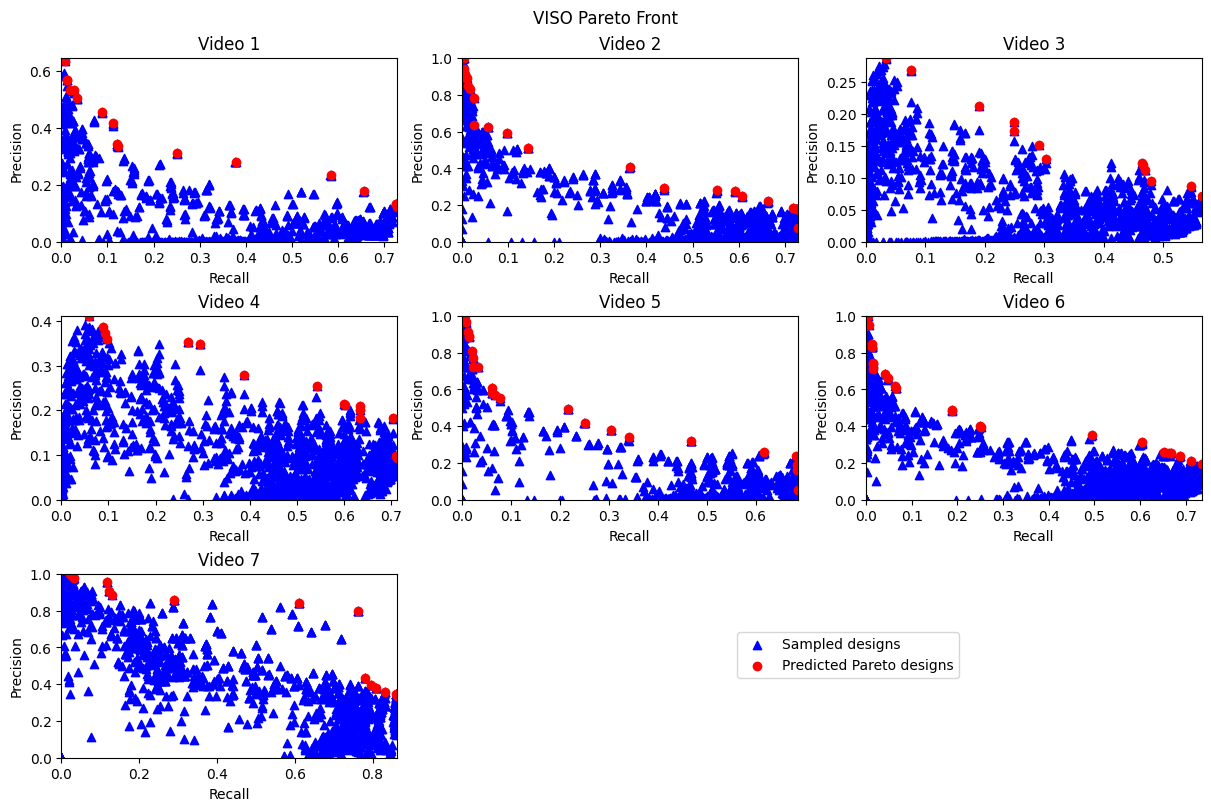

In [7]:
fig = plot_pareto_front("VISO", disable_network=DISABLE_NETWORK)

if SAVE_FIG:
    makedirs("./output/figures", exist_ok=True)
    fig.savefig("./output/figures/fig_viso_pareto.pdf", format="pdf")

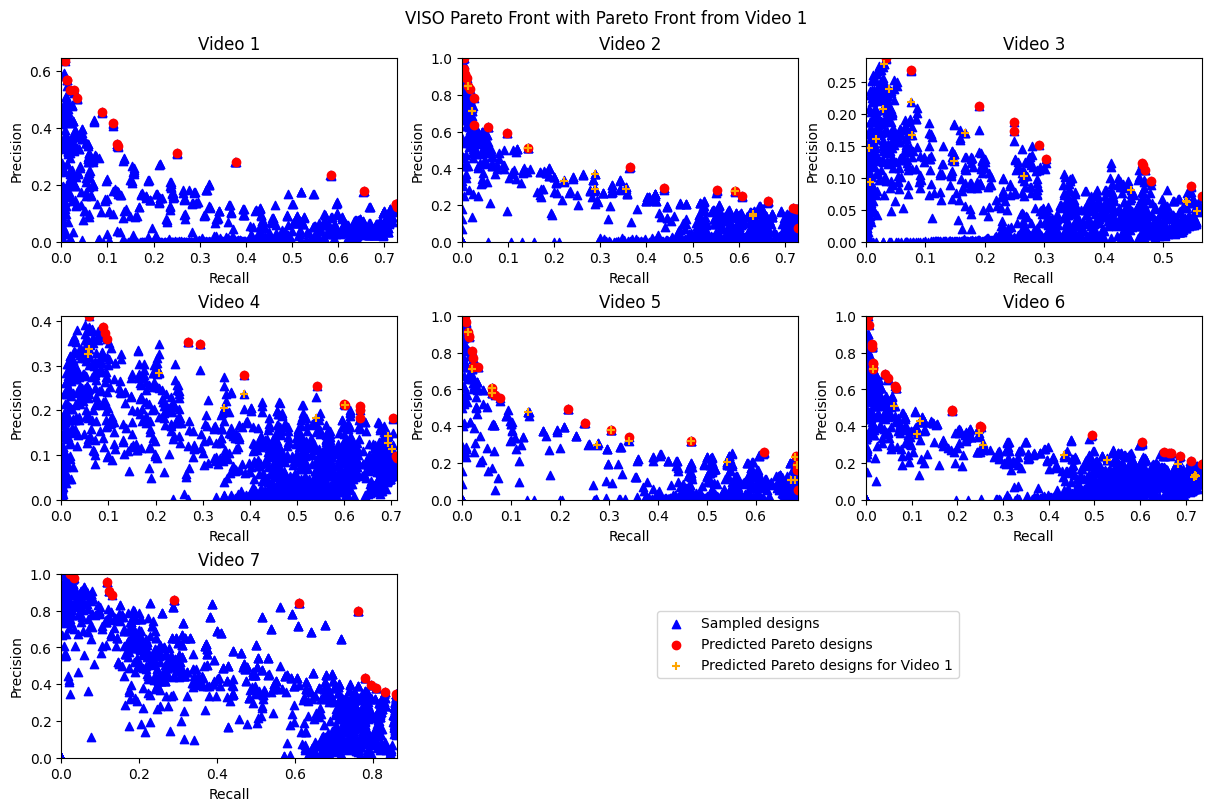

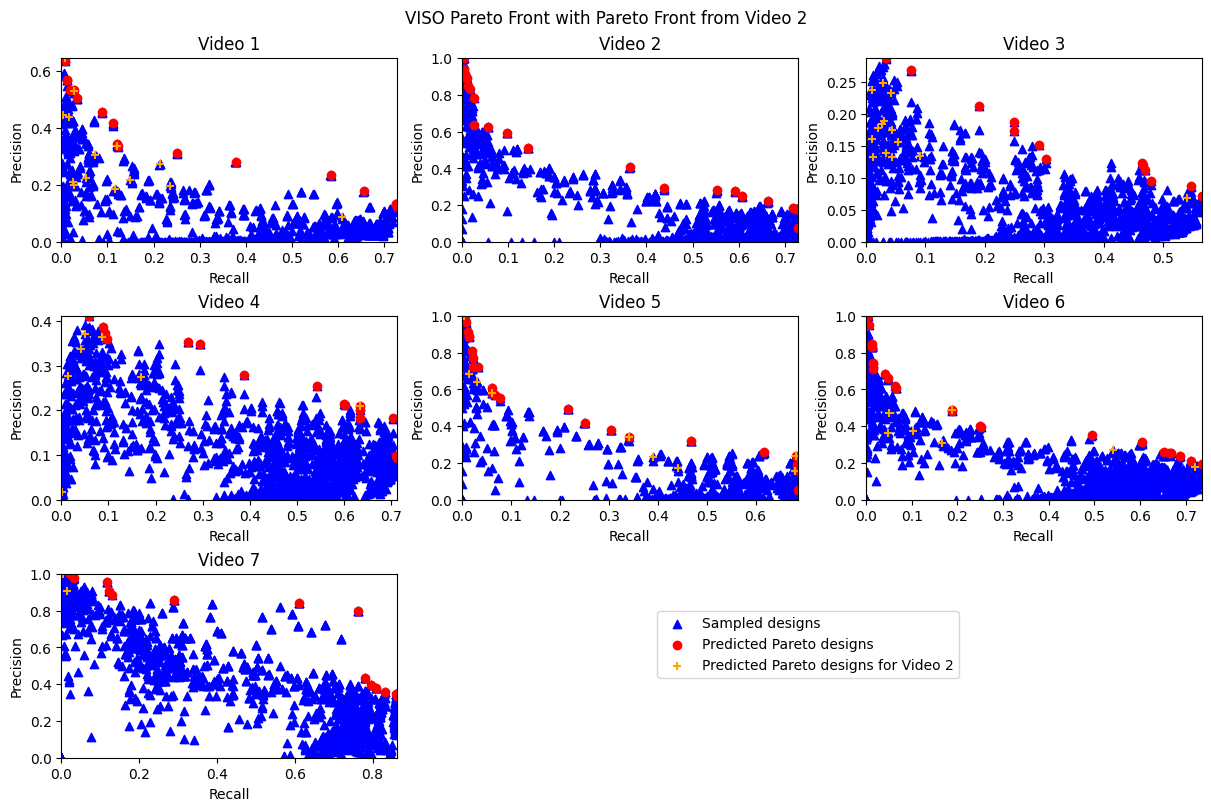

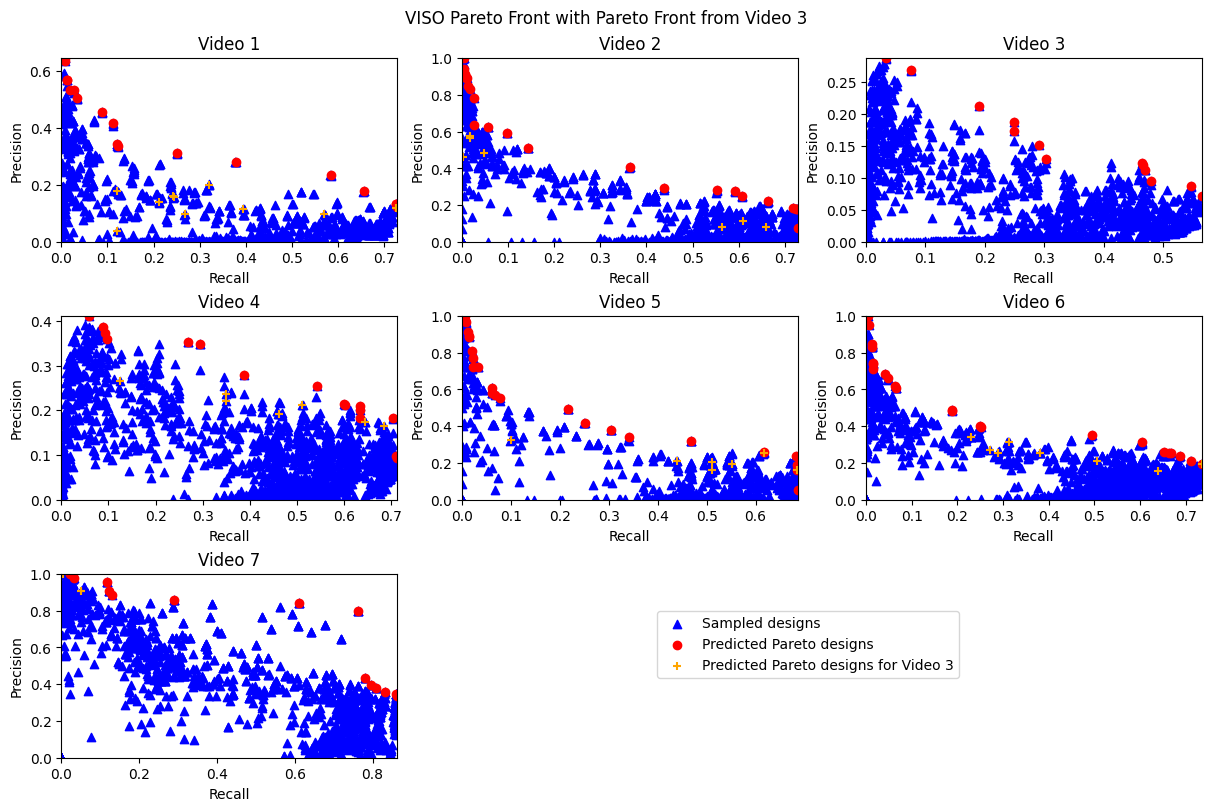

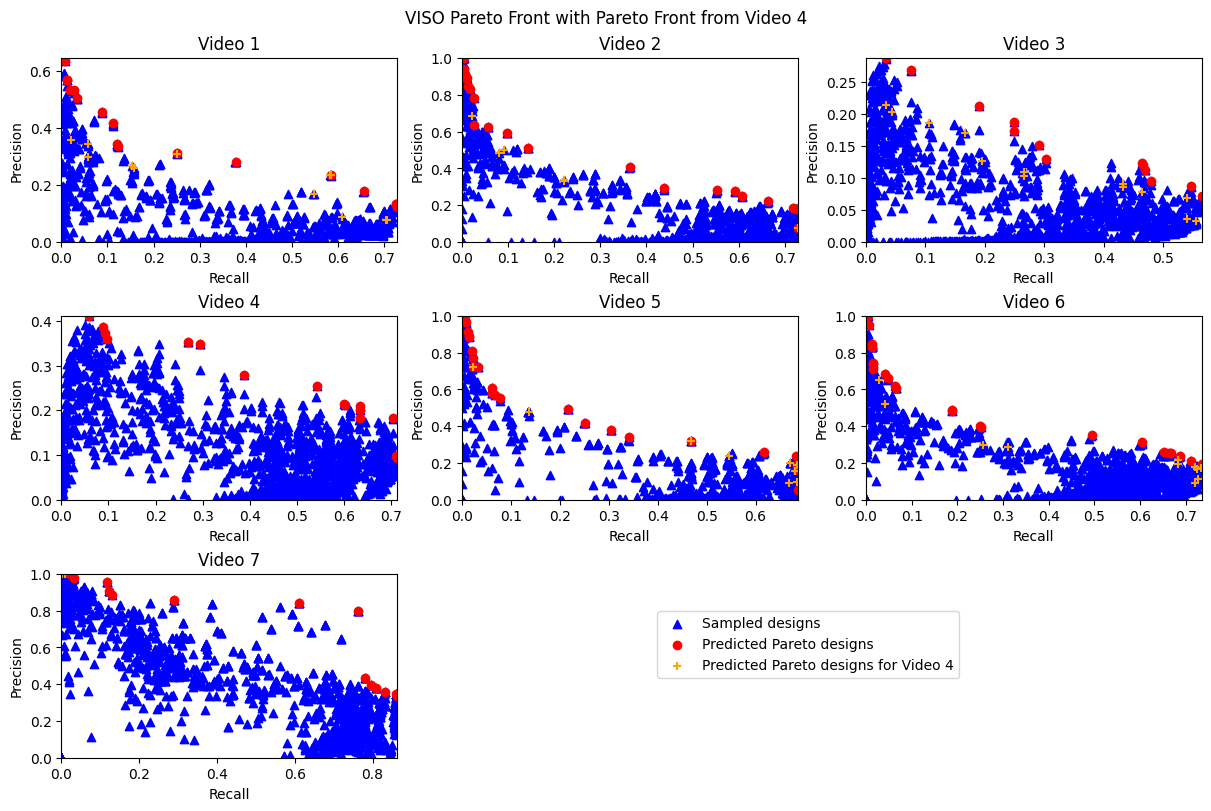

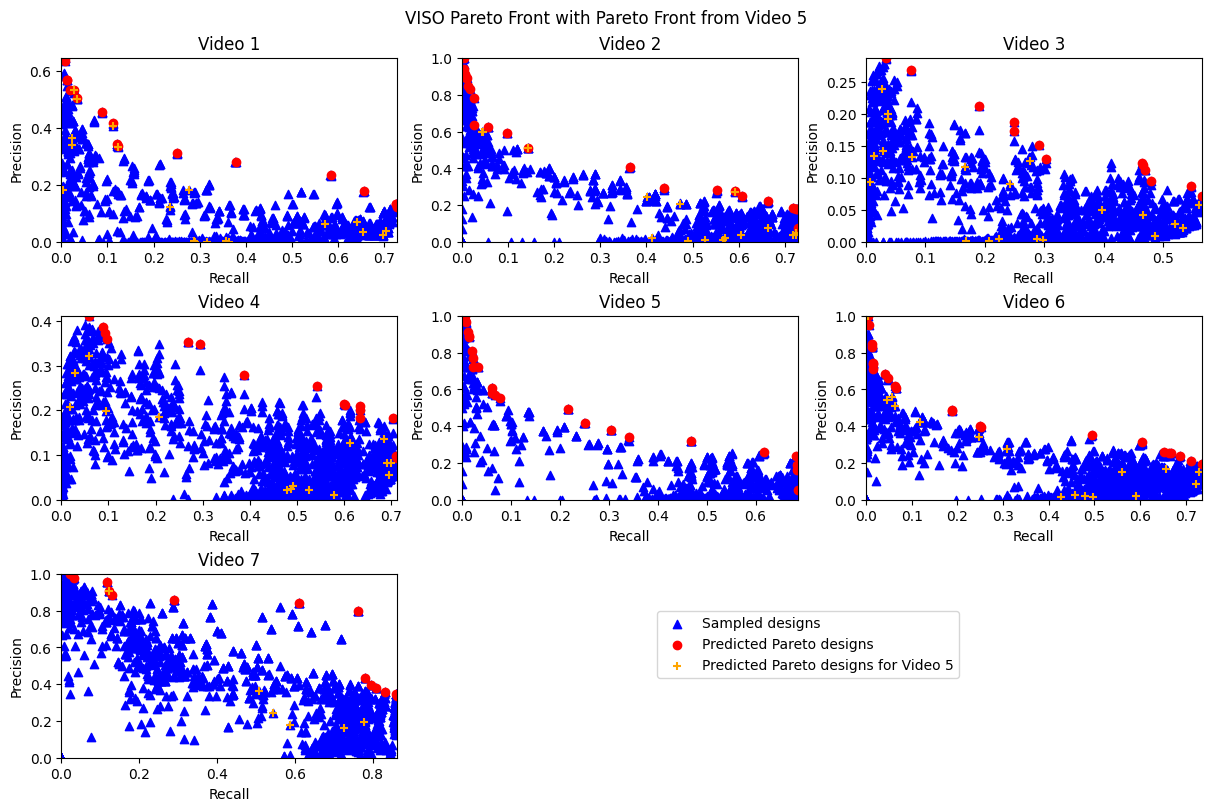

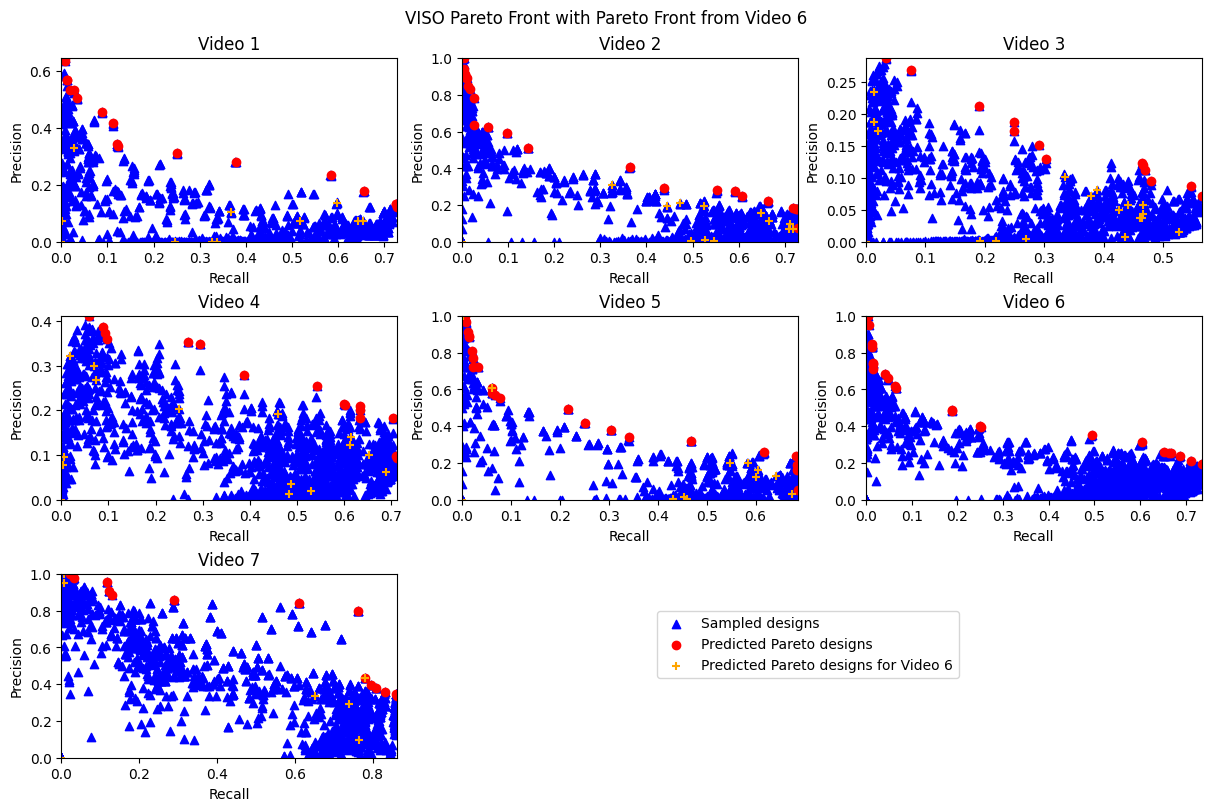

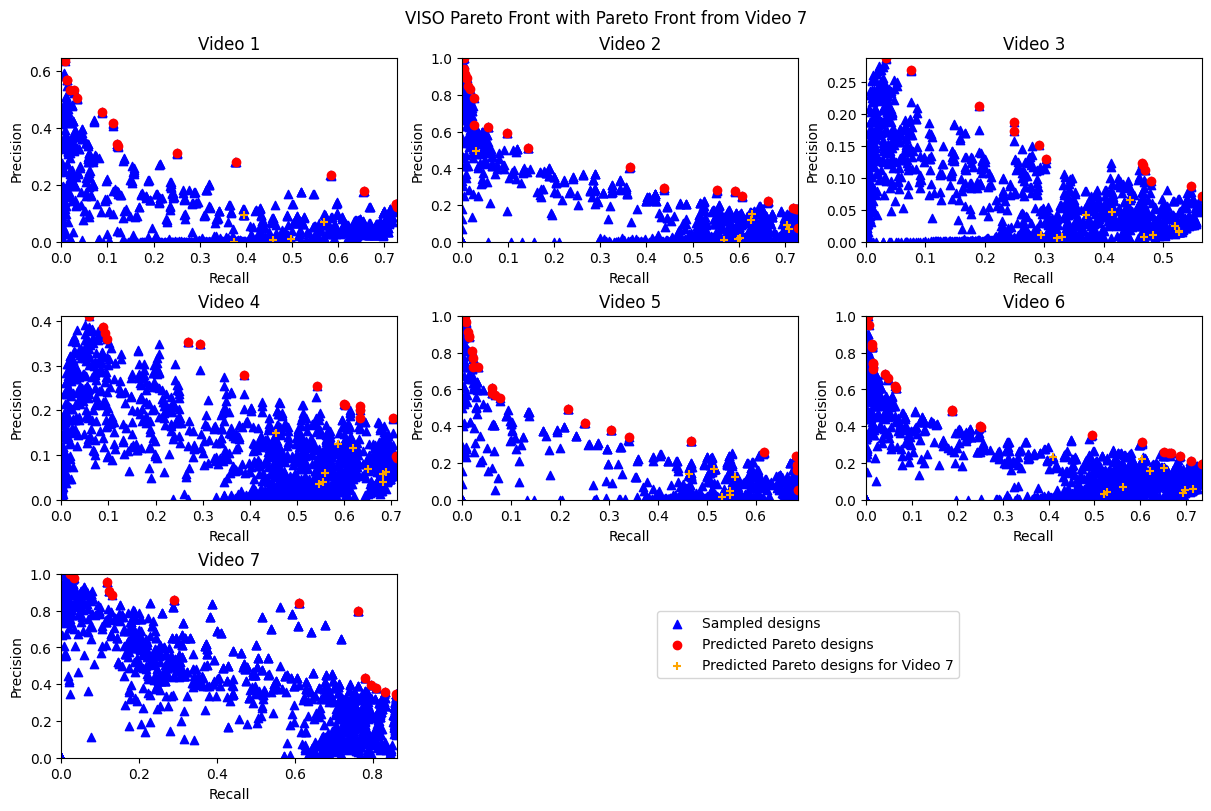

In [8]:
figs = plot_pareto_front_ref("VISO", disable_network=DISABLE_NETWORK)

if SAVE_FIG:
    makedirs("./output/figures", exist_ok=True)
    dataset_dict = get_video_files_dict("VISO")
    
    for video_file, fig in figs:
        video_name = [k for k, v in dataset_dict.items() if v == video_file][0]
        fig.savefig(f"./output/figures/fig_viso_{video_name.lower().replace(' ', '_')}_pareto.pdf", format="pdf")

## Baboon Dataset

In [9]:
from library.plot_helper import get_dataset_results

In [10]:
get_dataset_results("Baboons", disable_network=DISABLE_NETWORK)

,Video Name,Recall,Precision,F1,AP
0,Video 1,0.72,0.28,0.4,0.33


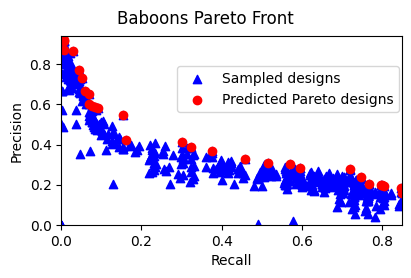

In [11]:
fig = plot_pareto_front("Baboons", disable_network=DISABLE_NETWORK)

if SAVE_FIG:
    makedirs("./output/figures", exist_ok=True)
    fig.savefig("./output/figures/fig_baboons_pareto.pdf", format="pdf")    